In [ ]:
%pip install -q datasets

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

# [1] Causal language modeling
- [источник](https://huggingface.co/docs/transformers/en/tasks/language_modeling)

There are two types of language modeling, causal and masked. This guide illustrates causal language modeling.
Causal language models are frequently used for text generation. You can use these models for creative applications like
choosing your own text adventure or an intelligent coding assistant like Copilot or CodeParrot.

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Vpjb1lu0MDk?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.11/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Causal language modeling predicts the next token in a sequence of tokens, and the model can only attend to tokens on
the left. This means the model cannot see future tokens. GPT-2 is an example of a causal language model.

This guide will show you how to:

1. Finetune [DistilGPT2](https://huggingface.co/distilgpt2) on the [r/askscience](https://www.reddit.com/r/askscience/) subset of the [ELI5](https://huggingface.co/datasets/eli5) dataset.
2. Use your finetuned model for inference.

<Tip>
You can finetune other architectures for causal language modeling following the same steps in this guide.
Choose one of the following architectures:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->
[BART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bart), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [Bert Generation](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert-generation), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BigBird-Pegasus](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bigbird_pegasus), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [Blenderbot](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/blenderbot), [BlenderbotSmall](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/blenderbot-small), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CodeGen](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/codegen), [CPM-Ant](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/cpmant), [CTRL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ctrl), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [GIT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/git), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [GPT NeoX Japanese](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox_japanese), [GPT-J](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gptj), [LLaMA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/llama), [Marian](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/marian), [mBART](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mbart), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MVP](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mvp), [OpenLlama](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/open-llama), [OpenAI GPT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/openai-gpt), [OPT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/opt), [Pegasus](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/pegasus), [PLBart](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/plbart), [ProphetNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/prophetnet), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [Reformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/reformer), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [RWKV](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rwkv), [Speech2Text2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/speech_to_text_2), [Transformer-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/transfo-xl), [TrOCR](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/trocr), [XGLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xglm), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-ProphetNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-prophetnet), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod)


<!--End of the generated tip-->

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

```bash
pip install transformers datasets evaluate
```

## Load ELI5 dataset

Start by loading a smaller subset of the r/askscience subset of the ELI5 dataset from the 🤗 Datasets library.
 This'll give you a chance to experiment and make sure everything works before spending more time training on the full dataset.

In [ ]:
from datasets import load_dataset

eli5 = load_dataset("eli5_category", split="train[:5000]", trust_remote_code=True)

Generating train split:   0%|          | 0/91772 [00:00<?, ? examples/s]

Generating validation1 split:   0%|          | 0/5446 [00:00<?, ? examples/s]

Generating validation2 split:   0%|          | 0/2375 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5411 [00:00<?, ? examples/s]

Split the dataset's `train_asks` split into a train and test set with the [train_test_split](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.train_test_split) method:

In [ ]:
eli5 = eli5.train_test_split(test_size=0.2)

Then take a look at an example:

In [ ]:
eli5["train"].to_pandas()

,q_id,title,selftext,category,subreddit,answers,title_urls,selftext_urls
0,7hezg4,Why is astronaut Scott Kelly’s body suffering ...,"He is suffering joint pain, swelling, rashes, ...",Biology,explainlikeimfive,"{'a_id': ['dqqi0ba', 'dqqj838'], 'text': ['Low...",[url],[url]
1,7gnoqb,How does charcoal clean your face?,"Recently, I've been seeing a lot of advertisem...",Chemistry,explainlikeimfive,"{'a_id': ['dqkf0a5', 'dqkjkx5', 'dqkihgy'], 't...",[url],[url]
2,77ibuh,Why aren't jobs always upfront about the pay w...,,Other,explainlikeimfive,"{'a_id': ['dom2uuj'], 'text': ['It's a negotia...",[url],[url]
3,77g372,What is a disjunctive syllogism?,Everywhere I go online to figure out this term...,Other,explainlikeimfive,"{'a_id': ['doljq8d'], 'text': ['First let's br...",[url],[url]
4,5px15l,Why do women's breasts get bigger before they ...,,Biology,explainlikeimfive,"{'a_id': ['dcuh0m7'], 'text': ['About a week b...",[url],[url]
...,...,...,...,...,...,...,...,...
3995,7eqh2h,Why does breathing in through the nose and out...,,Biology,explainlikeimfive,"{'a_id': ['dq6qug4', 'dq6r7bc'], 'text': ['I t...",[url],[url]
3996,5m7uap,Why do clouds turn dark when they are about to...,,Physics,explainlikeimfive,"{'a_id': ['dc1gr1d'], 'text': ['When sunlight ...",[url],[url]
3997,5mr754,How do waterfalls freeze?,If the water is continuously falling at a rapi...,Other,explainlikeimfive,"{'a_id': ['dc5pcsx', 'dc66zum', 'dc5yo3o', 'dc...",[url],[url]
3998,747nwi,Why do cops in movies and TV shows taste the c...,,Other,explainlikeimfive,"{'a_id': ['dnw30tr', 'dnw4wmh'], 'text': ['May...",[url],[url]


While this may look like a lot, you're only really interested in the `text` field. What's cool about language modeling
tasks is you don't need labels (also known as an unsupervised task) because the next word *is* the label.

## Preprocess

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ma1TrR7gE7I?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

The next step is to load a DistilGPT2 tokenizer to process the `text` subfield:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

You'll notice from the example above, the `text` field is actually nested inside `answers`. This means you'll need to
extract the `text` subfield from its nested structure with the [`flatten`](https://huggingface.co/docs/datasets/process.html#flatten) method:

In [ ]:
eli5 = eli5.flatten()
eli5["train"][0]

{'q_id': '7hezg4',
 'title': 'Why is astronaut Scott Kelly’s body suffering severe health issues after 300+ days in space?',
 'selftext': 'He is suffering joint pain, swelling, rashes, vision problems, etc.',
 'category': 'Biology',
 'subreddit': 'explainlikeimfive',
 'answers.a_id': ['dqqi0ba', 'dqqj838'],
 'answers.text': ["Low gravity causes problems with our bodies since they were built around an environment where there are certain pressures places on our body from living on Earth. Since he is in space with none of these pressures (namely gravity) his body becomes weaker, his blood flow is effected, pressure on the eyes is effected, etc. ETA: We just aren't built to be in zero g for long periods of time. Its one of the problems that prevent us from going to Mars right now is that it would take a year for a round trip. Thats really hard on our bodies and we haven't come up with a way to counter the effects yet.",
  "Spend enough time in space and you start to turn into a jellyfish, 

Each subfield is now a separate column as indicated by the `answers` prefix, and the `text` field is a list now. Instead
of tokenizing each sentence separately, convert the list to a string so you can jointly tokenize them.

Here is a first preprocessing function to join the list of strings for each example and tokenize the result:

In [ ]:
def preprocess_function(examples):
    return tokenizer([" ".join(x) for x in examples["answers.text"]])

To apply this preprocessing function over the entire dataset, use the 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) method. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once, and increasing the number of processes with `num_proc`. Remove any columns you don't need:

In [ ]:
tokenized_eli5 = eli5.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=eli5["train"].column_names,
)

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2896 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2153 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1500 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3302 > 1024). Running this sequence through the model will result in indexing errors


Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1140 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3854 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1133 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1322 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
tokenized_eli5

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 1000
    })
})

This dataset contains the token sequences, but some of these are longer than the maximum input length for the model.

You can now use a second preprocessing function to
- concatenate all the sequences
- split the concatenated sequences into shorter chunks defined by `block_size`, which should be both shorter than the maximum input length and short enough for your GPU RAM.

In [ ]:
block_size = 128


def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
    # customize this part to your needs.
    if total_length >= block_size:
        total_length = (total_length // block_size) * block_size
    # Split by chunks of block_size.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

Apply the `group_texts` function over the entire dataset:

In [ ]:
lm_dataset = tokenized_eli5.map(group_texts, batched=True, num_proc=4)

Map (num_proc=4):   0%|          | 0/4000 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Now create a batch of examples using [DataCollatorForLanguageModeling](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling). It's more efficient to *dynamically pad* the
sentences to the longest length in a batch during collation, instead of padding the whole dataset to the maximum length.

Use the end-of-sequence token as the padding token and set `mlm=False`. This will use the inputs as labels shifted to the right by one element:

In [ ]:
from transformers import DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

## Train

<Tip>

If you aren't familiar with finetuning a model with the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer), take a look at the [basic tutorial](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-with-pytorch-trainer)!

</Tip>

You're ready to start training your model now! Load DistilGPT2 with [AutoModelForCausalLM](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForCausalLM):

In [ ]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer

model = AutoModelForCausalLM.from_pretrained("distilgpt2")
model = model.to(device)

At this point, only three steps remain:

1. Define your training hyperparameters in [TrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.TrainingArguments). The only required parameter is `output_dir` which specifies where to save your model. You'll push this model to the Hub by setting `push_to_hub=True` (you need to be signed in to Hugging Face to upload your model).
2. Pass the training arguments to [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) along with the model, datasets, and data collator.
3. Call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) to finetune your model.

In [ ]:
import wandb
wandb.init(mode="disabled")

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_eli5_clm-model",
    eval_strategy="epoch",
    num_train_epochs=0.1,
    learning_rate=2e-5,
    weight_decay=0.01,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_dataset["train"],
    eval_dataset=lm_dataset["test"],
    data_collator=data_collator,
)

trainer.train()

Epoch,Training Loss,Validation Loss
0,No log,3.915920


TrainOutput(global_step=129, training_loss=3.989967996759932, metrics={'train_runtime': 72.4992, 'train_samples_per_second': 14.142, 'train_steps_per_second': 1.779, 'total_flos': 33707280826368.0, 'train_loss': 3.989967996759932, 'epoch': 0.10062402496099844})

In [ ]:
trainer.save_model("my_awesome_eli5_clm-model")
tokenizer.save_pretrained("my_awesome_eli5_clm-model")

('my_awesome_eli5_clm-model/tokenizer_config.json',
 'my_awesome_eli5_clm-model/special_tokens_map.json',
 'my_awesome_eli5_clm-model/vocab.json',
 'my_awesome_eli5_clm-model/merges.txt',
 'my_awesome_eli5_clm-model/added_tokens.json',
 'my_awesome_eli5_clm-model/tokenizer.json')

Once training is completed, use the [evaluate()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.evaluate) method to evaluate your model and get its perplexity:

In [ ]:
import math

eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 49.93


<Tip>

For a more in-depth example of how to finetune a model for causal language modeling, take a look at the corresponding
[PyTorch notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/language_modeling.ipynb)
or [TensorFlow notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/language_modeling-tf.ipynb).

</Tip>

## Inference

Great, now that you've finetuned a model, you can use it for inference!

Come up with a prompt you'd like to generate text from:

In [ ]:
prompt = "Somatic hypermutation allows the immune system to"

The simplest way to try out your finetuned model for inference is to use it in a [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Instantiate a `pipeline` for text generation with your model, and pass your text to it:

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="my_awesome_eli5_clm-model", device=device)

Device set to use cuda


In [ ]:
result = generator(prompt)
result

[{'generated_text': 'Somatic hypermutation allows the immune system to adapt rapidly to different mutations and mutations. This helps to keep the tumor\'s surface area from getting pushed forward too much, with many different kinds of modifications needed. This change in size has been called "'}]

In [ ]:
result[0]['generated_text']

'Somatic hypermutation allows the immune system to adapt rapidly to different mutations and mutations. This helps to keep the tumor\'s surface area from getting pushed forward too much, with many different kinds of modifications needed. This change in size has been called "'

Tokenize the text and return the `input_ids` as PyTorch tensors:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("my_awesome_eli5_clm-model")
inputs = tokenizer(prompt, return_tensors="pt").input_ids

Use the [generate()](https://huggingface.co/docs/transformers/main/en/main_classes/text_generation#transformers.GenerationMixin.generate) method to generate text.
For more details about the different text generation strategies and parameters for controlling generation, check out the [Text generation strategies](https://huggingface.co/docs/transformers/main/en/tasks/../generation_strategies) page.

In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("my_awesome_eli5_clm-model")
outputs = model.generate(inputs, max_new_tokens=100, do_sample=True, top_k=50, top_p=0.95)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Decode the generated token ids back into text:

In [ ]:
tokenizer.batch_decode(outputs, skip_special_tokens=True)

["Somatic hypermutation allows the immune system to block the harmful effects of heat, heat and other substances. In addition, the immune system may stop the harmful effects of heat and other substances. However, it can also control your immune system when it's cold. The same process that causes you to cough up a lot of calories and calories is called high levels of cholesterol, which are considered high levels of cholesterol. As this happens in a cold, we usually take our food as an electrolyte to prevent the accumulation of cholesterol. It's not just"]

# [2] LoRA Adapter
- [PEFT](https://huggingface.co/docs/peft/main/en/quicktour)
- [статья на Medium](https://medium.com/@shelikohan/low-rank-adapter-lora-explained-0d3677395639)

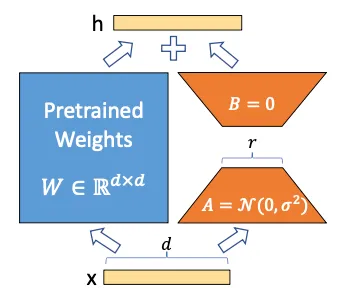


## Основные гиперпараметры LoRA

| Параметр         | Что означает                                      | Типичное значение       |
|------------------|---------------------------------------------------|--------------------------|
| `r`              | **Ранг матрицы** (размерность адаптера)           | `4`, `8`, `16`           |
| `lora_alpha`     | Коэффициент масштабирования (`α / r`)             | `16`, `32`, `64`         |
| `lora_dropout`   | Dropout перед LoRA                                 | `0.05`, `0.1`            |
| `bias`           | Обновлять ли смещения                              | `"none"`, `"lora_only"`, `"all"` |
| `target_modules` | В какие слои вставлять LoRA                        | `"c_attn"`, `"q_proj"`, `"v_proj"` |

---

## Рекомендации по выбору `r`

| `r`       | Использовать когда                                  | Примеры                    |
|-----------|------------------------------------------------------|----------------------------|
| `2`–`4`   | Модель небольшая, важна скорость                     | GPT2, DistilGPT2, BERT-mini |
| `8`       | Умеренный компромисс между качеством и экономией     | GPT2-Medium, BERT-base     |
| `16`      | Большие модели, нужен максимум качества              | LLaMA, BLOOM, T5-Large     |

> 📌 Чем выше `r`, тем больше обучаемых параметров → выше качество, но и ресурсы.

---

## Рекомендации по `lora_alpha`

- Обычно берут `α = 2 * r`, `4 * r`, иногда `8 * r`
- Это масштаб влияния LoRA-части на итоговый выход
- Если модель недообучает — увеличьте `alpha`

---

## Рекомендации по `lora_dropout`

- `0.05` — почти всегда оптимальное значение
- Если данных мало — можно увеличить до `0.1`
- Если данных много — можно уменьшить или отключить

---

## Практические комбинации

| Ситуация                           | Рекомендации                         |
|------------------------------------|--------------------------------------|
| Модель маленькая (GPT2-small)      | `r=4`, `alpha=16`, `dropout=0.05`    |
| Средняя модель (GPT2-medium, T5)   | `r=8`, `alpha=32`, `dropout=0.05`    |
| Минимальный адаптер                | `r=2`, `alpha=4`                     |
| Максимальное качество              | `r=16`, `alpha=64`, `dropout=0.05`   |

---

## Оценка числа параметров

Число обучаемых параметров:

```
LoRA-парам. ≈ r × (d_in + d_out)
```

Например, если `r=8` и слой `768→768`:

```
Параметров = 8 × (768 + 768) = 12,288
```

---

## Быстрый старт

Начни с «золотой середины»:

```python
r = 8
alpha = 32
lora_dropout = 0.05
bias = "none"
```
Подходит почти для всех задач на GPT, BERT и T5.


In [ ]:
# 1. Загрузка базовой модели
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("distilgpt2")
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
import torch
import torch.nn as nn

# Пример: хотим имитировать Linear(10, 20)
linear = nn.Linear(10, 20)
conv = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=1)

# Синхронизируем веса (для проверки)
conv.weight.data.copy_(linear.weight.data.view(20, 10, 1))
conv.bias.data.copy_(linear.bias.data)

# Вход: (batch, seq_len, in_features)
x = torch.randn(2, 5, 10)

# Преобразуем под Conv1d: (batch, in_channels, seq_len)

# Сравнение
y1 = linear(x)             # (2, 5, 20)
y2 = conv(x.permute(0, 2, 1)).permute(0, 2, 1)  # (2, 5, 20)

print(torch.allclose(y1, y2))  # True

True


In [ ]:
# 2. Добавление LoRA с помощью PEFT
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=4,
    lora_alpha=16,
    # target_modules=["c_attn"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM,
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()
model

trainable params: 73,728 || all params: 81,986,304 || trainable%: 0.0899


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/layer.py:1264: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): GPT2LMHeadModel(
      (transformer): GPT2Model(
        (wte): Embedding(50257, 768)
        (wpe): Embedding(1024, 768)
        (drop): Dropout(p=0.1, inplace=False)
        (h): ModuleList(
          (0-5): 6 x GPT2Block(
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (attn): GPT2Attention(
              (c_attn): lora.Linear(
                (base_layer): Conv1D(nf=2304, nx=768)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=768, out_features=4, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=4, out_features=2304, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
            

In [ ]:
%pip install -q datasets

In [ ]:
# 3. Простая тренировочная выборка
from datasets import load_dataset

tokenizer.pad_token = tokenizer.eos_token
dataset = load_dataset("eli5_category", split="train[:1000]", trust_remote_code=True)

def preprocess(example):
    return tokenizer(example["title"], padding="max_length", truncation=True, max_length=128)

dataset = dataset.map(preprocess)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask"])


In [ ]:
import wandb
wandb.init(mode="disabled")

In [ ]:
# 4. Обучение с Trainer
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="my_awesome_eli5_clm-model_lora",
    eval_strategy="epoch",
    num_train_epochs=0.1,
    learning_rate=2e-5,
    weight_decay=0.01,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_dataset["train"],
    eval_dataset=lm_dataset["test"],
    data_collator=data_collator,
)

trainer.train()

In [ ]:
# 5. Генерация текста
inputs = tokenizer("Why is the sky blue?", return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Why is the sky blue?”

“I’m not sure if it’s a blue, but it’s a blue.”
“I’m not sure if it’s a blue, but it�


# [3] Training PEFT models with new tokens being added to the embedding layers and tokenizer

In this example, we will learn how to train a LoRA model when adding new tokens to the tokenizer and model.
This is a common usecase when doing the following:
1. Instruction finetuning with new tokens beind added such as `<|user|>`, `<|assistant|>`, `<|system|>`, `</s>`, `<s>` to properly format the conversations
2. Finetuning on a specific language wherein language spoecific tokens are added, e.g., korean tokens being added to vocabulary for finetuning LLM on Korean datasets.
3. Instruction finetuning to return outputs in certain format to enable agent behaviour new tokens such as `<|FUNCTIONS|>`, `<|BROWSE|>`, `<|TEXT2IMAGE|>`, `<|ASR|>`, `<|TTS|>`, `<|GENERATECODE|>`, `<|RAG|>`.

In such cases, you add the Embedding modules to the LORA `target_modules`. PEFT will take care of saving the embedding layers with the new added tokens along with the adapter weights that were trained on the specific initialization of the embeddings weights of the added tokens.

Let's import the necessary libraries

In [ ]:
%pip install -q git+https://github.com/huggingface/peft

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
%pip install -q dataclass-csv

In [ ]:
import os

import transformers
from peft import (
    LoraConfig,
    PeftConfig,
    PeftModel,
    get_peft_model,
)
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    HfArgumentParser,
    TrainingArguments,
    Trainer,
    default_data_collator,
)
import torch
from dataclasses import dataclass, field
from typing import Optional
from dataclass_csv import DataclassReader
from torch.utils.data import Dataset, DataLoader

from enum import Enum

123

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "gpt2"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # gpt2 без pad_token

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
import torch
import torch.nn as nn

# Пример: хотим имитировать Linear(10, 20)
linear = nn.Linear(10, 20)
conv = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=1)

# Синхронизируем веса (для проверки)
conv.weight.data.copy_(linear.weight.data.view(20, 10, 1))
conv.bias.data.copy_(linear.bias.data)

# Вход: (batch, seq_len, in_features)
x = torch.randn(2, 5, 10)

# Преобразуем под Conv1d: (batch, in_channels, seq_len)

# Сравнение
y1 = linear(x)                                  # (2, 5, 20)
y2 = conv(x.permute(0, 2, 1)).permute(0, 2, 1)  # (2, 5, 20)

print(torch.allclose(y1, y2))  # True


True


In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["c_attn"],  # у distilgpt2 тот же механизм qkv → c_attn
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM,
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


trainable params: 147,456 || all params: 82,060,032 || trainable%: 0.1797


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/layer.py:1264: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


## Prepare Model and Tokenizer

Now, we will be adding 27 new tokens as well as replace the existing pad, bos and eos tokens of the model.

In [ ]:
class SpecialTokens(str, Enum):
    begin_target = "<|begintarget|>"
    end_target = "<|endtarget|>"
    begin_context = "<|begincontext|>"
    end_context = "<|endcontext|>"
    system = "<|system|>"
    user = "<|user|>"
    begin_last_user_utterance = "<|beginlastuserutterance|>"
    end_last_user_utterance = "<|endlastuserutterance|>"
    begin_dsts = "<|begindsts|>"
    end_dsts = "<|enddsts|>"
    begin_dst = "<|begindst|>"
    end_dst = "<|enddst|>"
    begin_belief = "<|beginbelief|>"
    end_belief = "<|endbelief|>"
    begin_response = "<|beginresponse|>"
    end_response = "<|endresponse|>"
    begin_action = "<|beginaction|>"
    end_action = "<|endaction|>"
    begin_user_action = "<|beginuseraction|>"
    end_user_action = "<|enduseraction|>"
    sys_actions = "<|sysactions|>"
    begin_intent = "<|beginintent|>"
    end_intent = "<|endintent|>"
    begin_requested_slots = "<|beginrequestedslots|>"
    end_requested_slots = "<|endrequestedslots|>"
    pad_token = "<|pad|>"
    bos_token = "<|startoftext|>"

    @classmethod
    def list(cls):
        return [c.value for c in cls]

We will be finetuning Mistral-7B model. Let's load the tokenizer and add the special tokens followed by loading the base model and resizzing the embedding layers to accomodate the newly added tokens.

In [ ]:
model_name = "Qwen/Qwen2.5-0.5B"
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    pad_token=SpecialTokens.pad_token.value,
    bos_token=SpecialTokens.bos_token.value,
    eos_token=SpecialTokens.end_target.value,
    additional_special_tokens=SpecialTokens.list(),
)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True
    # use_flash_attention_2=True, # leading to an error
)
model.resize_token_embeddings(len(tokenizer))
model.to(device)

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151692, 896)
    (layers): ModuleList(
      (0-23): 24 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=896, out_features=896, bias=True)
          (k_proj): Linear(in_features=896, out_features=128, bias=True)
          (v_proj): Linear(in_features=896, out_features=128, bias=True)
          (o_proj): Linear(in_features=896, out_features=896, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
          (up_proj): Linear(in_features=896, out_features=4864, bias=False)
          (down_proj): Linear(in_features=4864, out_features=896, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((

## Apply LoRA

In [ ]:
config = LoraConfig(
    r=64, lora_alpha=128, lora_dropout=0.0, target_modules=["embed_tokens", "lm_head", "q_proj", "v_proj"]
)
model = get_peft_model(model, config)
print(model.print_trainable_parameters())
print(model)

trainable params: 23,856,640 || all params: 517,670,784 || trainable%: 4.6085
None
PeftModel(
  (base_model): LoraModel(
    (model): Qwen2ForCausalLM(
      (model): Qwen2Model(
        (embed_tokens): lora.Embedding(
          (base_layer): Embedding(151692, 896)
          (lora_dropout): ModuleDict(
            (default): Identity()
          )
          (lora_A): ModuleDict()
          (lora_B): ModuleDict()
          (lora_embedding_A): ParameterDict(  (default): Parameter containing: [torch.cuda.FloatTensor of size 64x151692 (cuda:0)])
          (lora_embedding_B): ParameterDict(  (default): Parameter containing: [torch.cuda.FloatTensor of size 896x64 (cuda:0)])
          (lora_magnitude_vector): ModuleDict()
        )
        (layers): ModuleList(
          (0-23): 24 x Qwen2DecoderLayer(
            (self_attn): Qwen2SdpaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=896, out_features=896, bias=True)
                (lora_dropou

/usr/local/lib/python3.10/dist-packages/peft/tuners/tuners_utils.py:500: UserWarning: Model with `tie_word_embeddings=True` and the tied_target_modules=['lm_head'] are part of the adapter. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. See for example https://github.com/huggingface/peft/issues/2018.
  with ctx():


## Prepare Dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("smangrul/assistant_chatbot_dataset")
dataset = dataset["train"].train_test_split(0.2)

text_column = "context"
label_column = "target"
max_length = 512


def preprocess_function(examples):
    batch_size = len(examples[text_column])
    targets = [str(x) for x in examples[label_column]]
    model_inputs = tokenizer(examples[text_column])
    labels = tokenizer(targets, add_special_tokens=False)  # don't add bos token because we concatenate with inputs
    for i in range(batch_size):
        sample_input_ids = model_inputs["input_ids"][i]
        label_input_ids = labels["input_ids"][i] + [tokenizer.eos_token_id]
        # print(i, sample_input_ids, label_input_ids)
        model_inputs["input_ids"][i] = sample_input_ids + label_input_ids
        labels["input_ids"][i] = [-100] * len(sample_input_ids) + label_input_ids
        model_inputs["attention_mask"][i] = [1] * len(model_inputs["input_ids"][i])
    # print(model_inputs)
    for i in range(batch_size):
        sample_input_ids = model_inputs["input_ids"][i]
        label_input_ids = labels["input_ids"][i]
        model_inputs["input_ids"][i] = [tokenizer.pad_token_id] * (
            max_length - len(sample_input_ids)
        ) + sample_input_ids
        model_inputs["attention_mask"][i] = [0] * (max_length - len(sample_input_ids)) + model_inputs[
            "attention_mask"
        ][i]
        labels["input_ids"][i] = [-100] * (max_length - len(sample_input_ids)) + label_input_ids
        model_inputs["input_ids"][i] = model_inputs["input_ids"][i][:max_length]
        model_inputs["attention_mask"][i] = model_inputs["attention_mask"][i][:max_length]
        labels["input_ids"][i] = labels["input_ids"][i][:max_length]
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


processed_datasets = dataset.map(
    preprocess_function,
    batched=True,
    num_proc=1,
    remove_columns=dataset["train"].column_names,
    load_from_cache_file=False,
    desc="Running tokenizer on dataset",
)

train_dataset = processed_datasets["train"]

README.md:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

data (1).csv:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1233 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/986 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/247 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 986
})

In [ ]:
train_dataloader = DataLoader(
    train_dataset, shuffle=True, collate_fn=default_data_collator, batch_size=8, pin_memory=True
)

In [ ]:
next(iter(train_dataloader))

{'input_ids': tensor([[151667, 151667, 151667,  ..., 151682, 151666, 151666],
         [151667, 151667, 151667,  ..., 151682, 151666, 151666],
         [151667, 151667, 151667,  ..., 151682, 151666, 151666],
         ...,
         [151667, 151667, 151667,  ..., 151682, 151666, 151666],
         [151667, 151667, 151667,  ..., 151682, 151666, 151666],
         [151667, 151667, 151667,  ..., 151682, 151666, 151666]]),
 'attention_mask': tensor([[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1]]),
 'labels': tensor([[  -100,   -100,   -100,  ..., 151682, 151666, 151666],
         [  -100,   -100,   -100,  ..., 151682, 151666, 151666],
         [  -100,   -100,   -100,  ..., 151682, 151666, 151666],
         ...,
         [  -100,   -100,   -100,  ..., 151682, 151666, 151666],
         [  -100,   -100,   -100,  ..., 151682, 15166

In [ ]:
tokenizer.decode(train_dataset[0]["input_ids"])

'<|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad|><|pad

## Train the model

In [ ]:
import wandb
wandb.init(mode="disabled")

In [ ]:
training_args = TrainingArguments(
    output_dir="qwen_lora_clm_with_added_tokens",
    num_train_epochs=0.2,
    save_total_limit=5,
    per_device_train_batch_size=8,
    warmup_steps=10,
    weight_decay=0.0001,
    dataloader_drop_last=True,
    bf16=True,
    logging_steps=10,
    learning_rate=1e-5,
    gradient_checkpointing=True,
    gradient_checkpointing_kwargs={"use_reentrant": False},
    remove_unused_columns=False,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=default_data_collator,
)
# model.config.use_cache = False
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss
10,4.645300
20,4.060200


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  and hasattr(config, "target_modules")


TrainOutput(global_step=25, training_loss=4.197197265625, metrics={'train_runtime': 164.4686, 'train_samples_per_second': 1.199, 'train_steps_per_second': 0.152, 'total_flos': 234550119628800.0, 'train_loss': 4.197197265625, 'epoch': 0.2032520325203252})

In [ ]:
trainer.save_model("qwen_lora_clm_with_added_tokens")
tokenizer.save_pretrained("qwen_lora_clm_with_added_tokens")

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:227: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  and hasattr(config, "target_modules")


('qwen_lora_clm_with_added_tokens/tokenizer_config.json',
 'qwen_lora_clm_with_added_tokens/special_tokens_map.json',
 'qwen_lora_clm_with_added_tokens/vocab.json',
 'qwen_lora_clm_with_added_tokens/merges.txt',
 'qwen_lora_clm_with_added_tokens/added_tokens.json',
 'qwen_lora_clm_with_added_tokens/tokenizer.json')

## Check the model output on a sample from evaluation dataset

In [ ]:
import random

i = random.randint(0, len(dataset["test"]))
context = dataset["test"][i]["context"]

batch = tokenizer(context, return_tensors="pt")
batch = {k: v.to(device) for k, v in batch.items()}
model.eval()
output_tokens = model.generate(
    **batch,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.2,
    top_p=0.95,
    top_k=50,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
)
target_predicted = tokenizer.decode(output_tokens[0], skip_special_tokens=False).split("<|endcontext|>")[1]
target = dataset["test"][i]["target"]
print(f"{context=} \n\n {target_predicted=} \n\n {target=}")

context="<|begincontext|><|user|>I'd like to find a place to eat in this city.<|system|>What kind of restaurants are you interested in? Which city should I search?<|user|>Look for burger restaurants in Campbell.<|system|>There's a good restaurant in Campbell called Effie's Restaurant & Bar<|user|>What is Effie's address and do they serve drinks?<|system|>They don't serve drinks but their address is 331 West Hacienda Avenue.<|user|>I'd like to make a reservation there.<|system|>What time would you like your reservation?<|user|>Make it on the 4th of this month please in the evening 6:30.<|system|>Please confirm your request: You'd like to book a table for 2 at Effie's Restaurant & Bar in Campbell at 6:30 pm for next Monday.<|user|>No I'd like a reservation on the 1st.<|system|>Please confirm the city you're booking in is Campbell and the date is for today.<|user|>No the reservation is for 3 people.<|system|>Please confirm: the reservation you want is for 6:30 pm for 3 people.<|user|>Yes,

## Save the Adapter model

When the lora layers are applied to embedding layers, the corresponding base model embedding layers are also saved.

## Check the model loading is working as expected and generating plausible outputs.

In [ ]:
from peft import PeftModel

inference_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    low_cpu_mem_usage=True,
    # use_flash_attention_2=True,
)
inference_model.resize_token_embeddings(len(tokenizer))

inference_model = PeftModel.from_pretrained(inference_model, "qwen_lora_clm_with_added_tokens")
inference_model.to(device)
inference_model.eval()

output_tokens = inference_model.generate(
    **batch,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.2,
    top_p=0.95,
    top_k=50,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
)

target_predicted = tokenizer.decode(output_tokens[0], skip_special_tokens=False).split("<|endcontext|>")[1]
print(f"{context=} \n\n {target_predicted=} \n\n {target=}")

/usr/local/lib/python3.10/dist-packages/peft/tuners/tuners_utils.py:531: UserWarning: Model with `tie_word_embeddings=True` and the tied_target_modules=['lm_head'] are part of the adapter. This can lead to complications, for example when merging the adapter or converting your model to formats other than safetensors. See for example https://github.com/huggingface/peft/issues/2018.
  warnings.warn(


context="<|begincontext|><|user|>I'm looking for somewhere to eat.<|system|>Which city should I search in? What kind of food are you looking for? You can say Italian, Mexican, or anything else.<|user|>Somewhere to eat in San Bruno. Some Latin American food is what I'm looking for.<|system|>Celia's Mexican Restaurant is a nice restaurant located in San Bruno.<|user|>Any other suggestions? Specifically places that serve alcohol.<|system|>I found 1 restaurants. Chili's Grill & Bar is a nice restaurant located in San Bruno.<|beginlastuserutterance|>That's good.<|endlastuserutterance|><|endcontext|>" 

 target_predicted='浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈浈' 

 target="<|begintarget|><|begindsts|><|begindst|><|beginintent|>FindRestaurants<|endintent|><|beginbelief|>Restauran